# <center>Exploratory Data Analysis (EDA) </center>

## Initial Data Analysis

In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words+=["restaurant", "restaurants", "food", "would", "place", "eat", "menu", "u", "n't", "ve"]
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# %matplotlib inline

In [2]:
reviews_data = pd.read_csv("data/il_reviews.csv", header = 0)
reviews_data.head()  # Snapshot of reviews data

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,mofOjB6flg-eAWOFbOkHfQ,0,2017-12-02 20:22:26,0,8MTptiOpUeuPUFZgtfk9Vw,1,I would have given this restaurant zero stars ...,1,9-vNlkNQL7OJQZ7-U965Ww
1,mofOjB6flg-eAWOFbOkHfQ,0,2017-12-16 04:31:05,0,ofpfzn8LV4nJ2pE6IlTVdg,1,So...no. Just...no. Before I picked up a plate...,1,-FcgbLbKjPgpst5qFU3-lg
2,mofOjB6flg-eAWOFbOkHfQ,0,2016-07-03 20:57:11,1,O3yApCw95tbA0kodflQrpA,5,The best food I want to the a lot of the buffe...,0,ShcyA_bTtqudK4eaSbtLGA
3,mofOjB6flg-eAWOFbOkHfQ,0,2017-05-13 23:25:06,0,fFTVZE7EENdl66SX9cgc0A,1,It's impressive how filthy this place is. Some...,0,oxcEFkXu_icNyp59Lb8GMQ
4,mofOjB6flg-eAWOFbOkHfQ,0,2014-10-12 22:16:18,0,pDlIw6DLLjZ5G1vJnMzr9A,5,I was visiting the Champaign area with my fami...,0,szNYE9rpw4Dv-J0LFs5R7g


In [3]:
reviews_data.info() # summary of the reviews dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 9 columns):
business_id    6703 non-null object
cool           6703 non-null int64
date           6703 non-null object
funny          6703 non-null int64
review_id      6703 non-null object
stars          6703 non-null int64
text           6703 non-null object
useful         6703 non-null int64
user_id        6703 non-null object
dtypes: int64(4), object(5)
memory usage: 471.4+ KB


In [4]:
reviews_data.describe()

,cool,funny,stars,useful
count,6703.000000,6703.000000,6703.000000,6703.000000
mean,0.332836,0.374907,3.476652,1.215277
std,0.902303,1.434581,1.441803,2.218730
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,2.000000
max,16.000000,37.000000,5.000000,38.000000


In [5]:
reviews_data.corr()   # corerraltion between numerical data

,cool,funny,stars,useful
cool,1.000000,0.386800,0.095492,0.608676
funny,0.386800,1.000000,-0.133010,0.363115
stars,0.095492,-0.133010,1.000000,-0.064078
useful,0.608676,0.363115,-0.064078,1.000000


Cool, funny and useful describes the number of cool, funny and useful votes given to the review.
From the above dataset description, it is observed that less than 25% of the reviewers has voted the reviews as cool, funny or useful.

So, the cool, funny and useful votes data is not useful here.  

In [6]:
reviews_data.drop(["cool","date","funny","useful"],axis = 1,inplace=True) # dropping cool, date, funny and useful columns
reviews_data.sample()

,business_id,review_id,stars,text,user_id
1918,_zCwyuW5XrRKw8oK8EM49A,p6xLhL8Gx1U0y9f4N9aQ8A,5,"If I die young, bury me in queso.\r\n\r\nQueso...",f2cl3k_kKEHiS34D_vlwgQ


## Data Visualization

In [7]:
reviews_data.stars.value_counts() # counts the stars rating in the reviews data

5    2198
4    1687
1    1044
3     974
2     800
Name: stars, dtype: int64

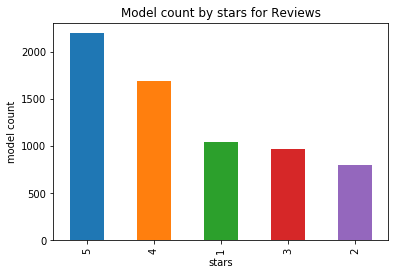

In [20]:
# plotting the stars rating againt count
ax = reviews_data.stars.value_counts().plot.bar(figsize=(6,4), title="Model count by stars for Reviews");  
ax.set(xlabel = "stars", ylabel = "model count");

From the above chart, we can analyze that the majority of reviews have received 5 start ratings... 

### Generating a word cloud for more visualization
-  Word cloud with stop words and without lemmatiztion to analyze the top words used in the reviews.

(-0.5, 399.5, 199.5, -0.5)

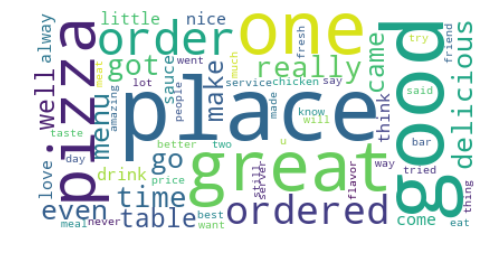

In [25]:
text = " ".join(x for x in reviews_data.text)  # raw reviews

# Create stopword list:
stop_words = set(STOPWORDS)
stop_words.update(["restaurant","restaurants", "food"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, min_font_size = 10, background_color = "white").generate(text)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

# Save the image in the img folder:
# wordcloud.to_file("Images/before_lemmatization.png")

In [10]:
business_data = pd.read_csv("data/IL_BusinessData.csv", header = 0)
business_data.head()

,attributes,business_id,categories,name,review_count,stars,state
0,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",ChinaTown Buffet,72,2.5,IL
1,"{'RestaurantsGoodForGroups': 'True', 'Business...",m4DwPVxmFDQE_FnGIOa3cQ,"Buffets, Chinese, Restaurants",Sunny China Buffet,15,3.5,IL
2,"{'Alcohol': ""u'full_bar'"", 'GoodForKids': 'Fal...",HbK6IfznbVToEaKVC0WcSg,"Karaoke, American (Traditional), Nightlife, Ta...",The Clark Bar,24,3.5,IL
3,"{'RestaurantsPriceRange2': '3', 'BusinessParki...",D88CTD2UrsSTsrDDuL04_A,"Bakeries, Shopping, Flowers & Gifts, Food, Res...",Jerry's Iga,5,4.0,IL
4,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",o9nGD3J0btXjE9M6IdgZTA,"Salad, Delis, Restaurants, Sandwiches, Food",McAlister's Deli,50,3.0,IL


In [11]:
business_data.drop(["attributes"], axis = 1, inplace = True)  # dropping attributes column

In [12]:
business_data.sample() # sample business dataset

,business_id,categories,name,review_count,stars,state
148,uma0HNsysznSfPbQb2HD5g,"Vietnamese, Restaurants",Saigon Vietnamese Cuisine,14,3.5,IL


In [ ]:
business_data.info() # summary of the business dataset

In [13]:
business_data.describe()

,review_count,stars
count,672.000000,672.000000
mean,41.372024,3.328869
std,66.431065,0.804069
min,3.000000,1.000000
25%,9.000000,3.000000
50%,21.000000,3.500000
75%,47.000000,4.000000
max,790.000000,5.000000


In [14]:
business_data.stars.value_counts()  # counts the stars rating in the business data

3.5    176
3.0    143
4.0    129
2.5     67
4.5     65
2.0     53
1.5     22
5.0     15
1.0      2
Name: stars, dtype: int64

In [16]:
business_data.corr()   # correlation between numeric data in the business dataset

,review_count,stars
review_count,1.000000,0.224105
stars,0.224105,1.000000


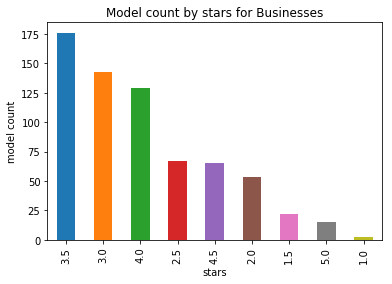

In [27]:
# plotting the stars rating againt count for business data

ax = business_data.stars.value_counts().plot.bar(figsize=(6,4), title="Model count by stars for Businesses");
ax.set(xlabel = "stars", ylabel = "model count");

In [ ]:
plt.show()